In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
#questions about importing from sklearn
import numpy as np
import seaborn as sns
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score
from sklearn.metrics import precision_recall_fscore_support
from sklearn import tree
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
import xgboost as xgb

In [3]:
df = pd.read_excel('census data.xlsx')


In [4]:
df["income"] = df["income"].map(lambda x: 1 if (x == ">50K") else 0)

In [5]:
X = df[[col for col in df.columns if col != 'income']]
y = df["income"]

In [6]:
X = pd.get_dummies(X)

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .2, random_state=42)

In [8]:
#decision tree
dt_model = tree.DecisionTreeClassifier()
dt_model.fit(X_train, y_train)
result = dt_model.predict(X_test)

In [9]:
print(accuracy_score(y_test,result))
print(precision_score(y_test,result))
print(recall_score(y_test,result))
print(f1_score(y_test,result))

0.8184051591769884
0.6066115702479339
0.6410480349344978
0.6233545647558386


<AxesSubplot:>

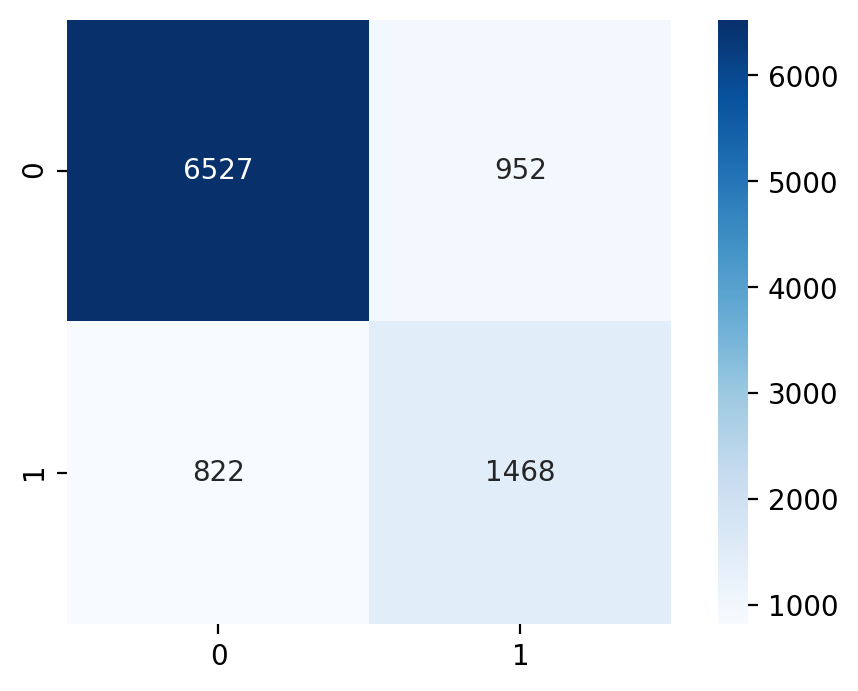

In [10]:
tc = confusion_matrix(y_test,result)
plt.figure(dpi=200)
sns.heatmap(tc, cmap=plt.cm.Blues, annot=True, square=True, fmt="d")

In [16]:
acc = []
recall = []
precision = []
f1 = []
n = 1

while n < 25:
    dt_model = tree.DecisionTreeClassifier(max_depth =n)
    dt_model.fit(X_train, y_train)
    result = dt_model.predict(X_test)
    acc.append(accuracy_score(y_test,result))
    precision.append(precision_score(y_test,result))
    recall.append(recall_score(y_test,result))
    f1.append(f1_score(y_test,result))
    print(n)
    n = n + 1

/Users/matthew.redmond@usfoods.com/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24


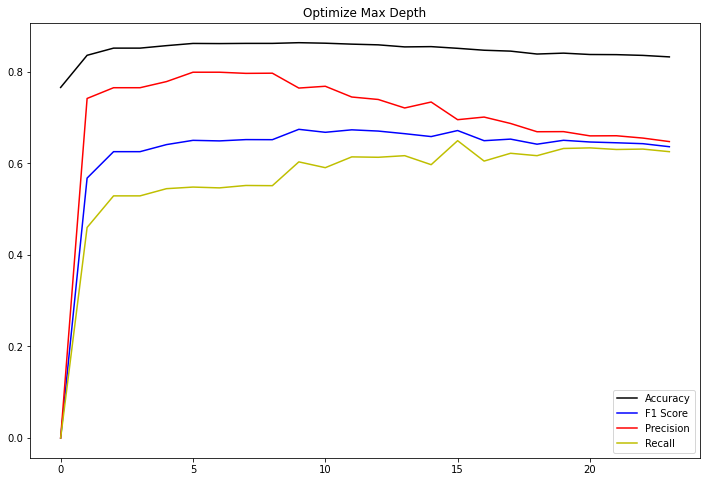

In [17]:
#Took some of this code from Lew's office hour
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(1,1,1)
ax.plot(acc, color = 'black', label = 'Accuracy')
ax.plot(f1[-len(acc):], color = 'b', label = 'F1 Score')
ax.plot(precision[-len(acc):], color = 'r', label = 'Precision')
ax.plot(recall[-len(acc):], color = 'y', label = 'Recall')
ax.set_title ("Optimize Max Depth")
ax.legend();
ax.axvline(x=10, ymin=1, color = 'r', ls = ':')

In [18]:
print(acc)
print(precision)
print(recall)
print(f1)

[0.7655850138192241, 0.8358071450506704, 0.8514689323369843, 0.8514689323369843, 0.8568942573446617, 0.8617053946156208, 0.8613983007472618, 0.8618077592384072, 0.8618077592384072, 0.8633432285802027, 0.8622172177295526, 0.8601699252738254, 0.8586344559320299, 0.8541304125294298, 0.8547446002661481, 0.8510594738458389, 0.8468625243115979, 0.8449175964786569, 0.8385709898659024, 0.8405159176988433, 0.8375473436380387, 0.8372402497696796, 0.8356024158050978, 0.8323267478759341]
[0.0, 0.7415492957746479, 0.7650031585596968, 0.7650031585596968, 0.7784019975031211, 0.7988542329726289, 0.7988505747126436, 0.7963430012610341, 0.7967171717171717, 0.7642501383508578, 0.7681818181818182, 0.7447033898305084, 0.7393364928909952, 0.7207759060745278, 0.7337627482555019, 0.6951846657316503, 0.7009109311740891, 0.6869271587071877, 0.6688773093320701, 0.6691312384473198, 0.6598453842655753, 0.6601097895699909, 0.6550317316409792, 0.6473779385171791]
[0.0, 0.45982532751091704, 0.52882096069869, 0.528820